<a href="https://colab.research.google.com/github/redadmiral/python-for-journalists/blob/main/lessons/AI_Assistant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Der KI-Assistent

Der Assistent Gemini ist direkt in die Google Colabs integriert. Ihr könnt ihn direkt ansprechen - entweder über den `generate` Link in den Code-Blöcken oder rechts über die Gemini-Schaltfläche.

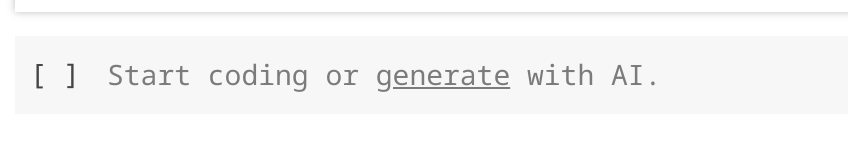


Das hier verwendete Sprachmodell ist bereits darauf eingestellt euch beim Programmieren im Colab Notebook zu unterstützen.

Bei der Arbeit mit dem Sprachmodell müsst ihr aber zwei Grundregeln beachten.

1. Braucht das Sprachmodell klare und detaillierte Anweisungen. Prompts wie "Schreibe meine Bachelorarbeit." funktionieren genauso wenig wie "Mache eine Datenanalyse". Ihr müsst in der Lage sein euer Problem in kleine Teilprobleme zu zerlgen, die dann vom Sprachmodell verarbeitet werden können.

2. Kann das Sprachmodell immer halluzinieren. Besonders bei komplexen Aufgaben wie der Datenanalyse sind Fehler des Sprachmodells oft nur schwer zu erkennen - besonders für Anfänger*innen. Wir versuchen deshalb Wege zu finden, dass das Sprachmodell sich selbst kontrollieren kann.

## Der Prompt

Um zu erreichen dass das Sprachmodell uns Code generiert, bilden wir einen Aussagesatz: "Bitte mach dies oder jenes.".

Wir fangen mit dem bereits bekannten Gastro-Datensatz aus Zürich an. Zuerst lesen wir ihn ein.

Dazu sagen wir dem Sprachmodell:

`Bitte lies den Datensatz aus dem Google Spreadsheet mit Pandas ein. Das Spreadsheet ist hier: https://docs.google.com/spreadsheets/d/1vtizSKxRLZXkANkqRQ5yQapnJBDetXM5SzyM3Amf-Go/edit?usp=sharing`

In [1]:
# prompt: Bitte lies den Datensatz aus dem Google Spreadsheet mit Pandas ein. Das Spreadsheet ist hier: https://docs.google.com/spreadsheets/d/1vtizSKxRLZXkANkqRQ5yQapnJBDetXM5SzyM3Amf-Go/edit?usp=sharing

import pandas as pd

# Die URL des Google Spreadsheets
sheet_url = 'https://docs.google.com/spreadsheets/d/1vtizSKxRLZXkANkqRQ5yQapnJBDetXM5SzyM3Amf-Go/edit?usp=sharing'

# Konvertiere die URL in eine CSV-URL
csv_url = sheet_url.replace('/edit?usp=sharing', '/export?format=csv')

# Lies die Daten aus der CSV-URL mit Pandas ein
try:
  df = pd.read_csv(csv_url)
  print(df.head()) # Zeigt die ersten paar Zeilen des DataFrames an
except Exception as e:
  print(f"Fehler beim Einlesen der Daten: {e}")

   StichtagDatJahr Betriebsname  StrasseLang HNr Ortschaft   PLZ  \
0             2020       01 Bar  Köngengasse   2    Zürich  8001   
1             2013       01 Bar  Köngengasse   2    Zürich  8001   
2             2014       01 Bar  Köngengasse   2    Zürich  8001   
3             2012       01 Bar  Köngengasse   2    Zürich  8001   
4             2017       01 Bar  Köngengasse   2    Zürich  8001   

   StatZoneSort StatZoneLang  QuarSort QuarLang  ...  KreisLang Oeffnungszeit  \
0             4     Prediger        11  Rathaus  ...    Kreis 1     0200/frei   
1             4     Prediger        11  Rathaus  ...    Kreis 1     0200/frei   
2             4     Prediger        11  Rathaus  ...    Kreis 1     0200/frei   
3             4     Prediger        11  Rathaus  ...    Kreis 1     0200/frei   
4             4     Prediger        11  Rathaus  ...    Kreis 1     0200/frei   

  BetriebsartSort  BetriebsartLang BetriebsstatusSort  BetriebsstatusLang  \
0               5   Gastwir

### Kontrolle

Hier können wir das Ergebnis noch leicht kontrollieren. Wir vergleichen einfach das Spreadsheet mit dem Ergebnis des generierten Codes.

Dabei stellen wir fest, dass die Spalten übereinstimmen und wir weiterarbeiten können.

### Limitierungen

Das Sprachmodell hat keinen direkten Zugriff auf unsere Daten. Das merken wir spätestens dann, wenn wir nach einzelnen Spalten fragen:

```
Welche Gaststätte hat die höchste Hausnummer?
```

In [12]:
# prompt: Welche Gaststätte hat die höchste Hausnummer?

# Finde die Gaststätte mit der höchsten Hausnummer
try:
  # Versuche, die Hausnummern als numerische Werte zu interpretieren.
  # Wenn die Spalte nicht numerisch ist oder leere Werte enthält, wird ein Fehler ausgelöst.
  df['Hausnummer'] = pd.to_numeric(df['Hausnummer'], errors='coerce')

  # Finde den Index des maximalen Werts in der Spalte 'Hausnummer'
  max_hausnummer_index = df['Hausnummer'].idxmax()

  # Gib den Namen der Gaststätte mit der höchsten Hausnummer aus
  if pd.notna(max_hausnummer_index): #Überprüft, ob der Index gültig ist
      gaststaette_mit_hoechster_hausnummer = df.loc[max_hausnummer_index, 'Name']
      print(f"Die Gaststätte mit der höchsten Hausnummer ist: {gaststaette_mit_hoechster_hausnummer}")
  else:
      print("Keine gültige Hausnummer gefunden.")

except KeyError:
  print("Die Spalte 'Hausnummer' existiert nicht im DataFrame.")
except Exception as e:
  print(f"Ein Fehler ist aufgetreten: {e}")

Die Spalte 'Hausnummer' existiert nicht im DataFrame.


Hier sehen wir, dass der Assistent auf die Spalte "Hausnummer" zugreifen will. Diese existiert nicht, deshalb funktioniert der Code nicht. Wir müssen dem Sprachmodell diese Information also mitgeben:

```
Welche Gaststätte hat die höchste Hausnummer?

Die Hausnummern sind in der Spalte `HNr` gespeichert.
```

In [13]:
# prompt: Welche Gaststätte hat die höchste Hausnummer?
# Die Hausnummern sind in der Spalte `HNr` gespeichert.

# Finde die Gaststätte mit der höchsten Hausnummer in der Spalte 'HNr'
try:
  # Versuche, die Hausnummern als numerische Werte zu interpretieren.
  # Ignoriere nicht-numerische Werte und setze sie auf NaN.
  df['HNr'] = pd.to_numeric(df['HNr'], errors='coerce')

  # Finde den Index des maximalen Werts in der Spalte 'HNr'
  max_hNr_index = df['HNr'].idxmax()

  # Gib den Namen der Gaststätte mit der höchsten Hausnummer aus
  if pd.notna(max_hNr_index):  # Überprüft, ob der Index gültig ist
    gaststaette_mit_hoechster_hausnummer = df.loc[max_hNr_index, 'Name']
    print(
        f"Die Gaststätte mit der höchsten Hausnummer ist: {gaststaette_mit_hoechster_hausnummer}"
    )
  else:
    print("Keine gültige Hausnummer in der Spalte 'HNr' gefunden.")

except KeyError:
  print("Die Spalte 'HNr' existiert nicht im DataFrame.")
except Exception as e:
  print(f"Ein Fehler ist aufgetreten: {e}")

Die Gaststätte mit der höchsten Hausnummer ist: Di Mama


Hier funktionierts jetzt immer noch nicht, weil das Sprachmodell sich den Namen für die Spalte der Gaststättennamen auch zusammendichtet.

Um zu überprüfen wo das Programm fehlschlägt können wir den try-except Clause entfernen und es nochmal laufen lassen. Das Notebook zeigt uns dann an welcher Stelle der Fehler auftritt.

In [14]:
# prompt: Welche Gaststätte hat die höchste Hausnummer?
# Die Hausnummern sind in der Spalte `HNr` gespeichert.

# Finde die Gaststätte mit der höchsten Hausnummer in der Spalte 'HNr'

# Versuche, die Hausnummern als numerische Werte zu interpretieren.
# Ignoriere nicht-numerische Werte und setze sie auf NaN.
df['HNr'] = pd.to_numeric(df['HNr'], errors='coerce')

# Finde den Index des maximalen Werts in der Spalte 'HNr'
max_hNr_index = df['HNr'].idxmax()

# Gib den Namen der Gaststätte mit der höchsten Hausnummer aus
if pd.notna(max_hNr_index):  # Überprüft, ob der Index gültig ist
  gaststaette_mit_hoechster_hausnummer = df.loc[max_hNr_index, 'Name']
  print(
      f"Die Gaststätte mit der höchsten Hausnummer ist: {gaststaette_mit_hoechster_hausnummer}"
  )
else:
  print("Keine gültige Hausnummer in der Spalte 'HNr' gefunden.")

KeyError: 'Name'

Wir können nun auf "Explain error" klicken und das Sprachmodell erklärt uns was schief läuft:

> The error message KeyError: 'Name' indicates that the column 'Name' is not found in your DataFrame df. You are trying to access it in this line:

```python
gaststaette_mit_hoechster_hausnummer = df.loc[max_hNr_index, 'Name']
```

> This error usually happens when the column name is misspelled or simply doesn't exist in the DataFrame.

Wir sehen also dass der Name falsch ist und können ihn austauschen.

In [15]:
# prompt: Welche Gaststätte hat die höchste Hausnummer?
# Die Hausnummern sind in der Spalte `HNr` gespeichert.

# Finde die Gaststätte mit der höchsten Hausnummer in der Spalte 'HNr'
try:
  # Versuche, die Hausnummern als numerische Werte zu interpretieren.
  # Ignoriere nicht-numerische Werte und setze sie auf NaN.
  df['HNr'] = pd.to_numeric(df['HNr'], errors='coerce')

  # Finde den Index des maximalen Werts in der Spalte 'HNr'
  max_hNr_index = df['HNr'].idxmax()

  # Gib den Namen der Gaststätte mit der höchsten Hausnummer aus
  if pd.notna(max_hNr_index):  # Überprüft, ob der Index gültig ist
    gaststaette_mit_hoechster_hausnummer = df.loc[max_hNr_index, 'Betriebsname']
    print(
        f"Die Gaststätte mit der höchsten Hausnummer ist: {gaststaette_mit_hoechster_hausnummer}"
    )
  else:
    print("Keine gültige Hausnummer in der Spalte 'HNr' gefunden.")

except KeyError:
  print("Die Spalte 'HNr' existiert nicht im DataFrame.")
except Exception as e:
  print(f"Ein Fehler ist aufgetreten: {e}")

Die Gaststätte mit der höchsten Hausnummer ist: Di Mama


## Kontrolle

Um zu kontrollieren, ob das Sprachmodell hier die richtige Lösung gefunden hat, können wir die ursprüngliche Frage umformulieren oder in mehrere Teile aufteilen.

Zuerst fragen wir welche Hausnummer die Gaststätte "Di Mama" hat. Dann suchen wir nach der höchsten Hausnummer. Diese beiden Zahlen sollten gleich sein, wenn der Code von oben stimmt.

```
Welche Hausnummer hat die Gaststätte "Di Mama"?

Die Hausnummer ist in der Spalte HNr, der Name der Gaststätte in der Spalte Betriebsname.
```

In [16]:
# prompt: Welche Hausnummer hat die Gaststätte "Di Mama"?
# Die Hausnummer ist in der Spalte HNr, der Name der Gaststätte in der Spalte Betriebsname.

# Finde die Hausnummer der Gaststätte "Di Mama"
try:
  di_mama_row = df[df['Betriebsname'] == 'Di Mama']
  if not di_mama_row.empty:
    hausnummer_di_mama = di_mama_row['HNr'].iloc[0]
    print(f'Die Hausnummer der Gaststätte "Di Mama" ist: {hausnummer_di_mama}')
  else:
    print('Die Gaststätte "Di Mama" wurde nicht gefunden.')
except KeyError:
  print("Die Spalte 'HNr' oder 'Betriebsname' existiert nicht im DataFrame.")
except Exception as e:
  print(f"Ein Fehler ist aufgetreten: {e}")

Die Hausnummer der Gaststätte "Di Mama" ist: 816.0


Hier erfahren wir, dass Di Mama die Hausnummer 816 hat. Nun fragen wir nach der höchsten Hausnummer.

```
Was ist die höchste Hausnummer in der Spalte HNr?
```

In [17]:
# prompt: Was ist die höchste Hausnummer in der Spalte HNr?

# Finde die höchste Hausnummer in der Spalte 'HNr'
try:
  max_hNr = df['HNr'].max()
  print(f"Die höchste Hausnummer in der Spalte 'HNr' ist: {max_hNr}")
except KeyError:
  print("Die Spalte 'HNr' existiert nicht im DataFrame.")
except Exception as e:
  print(f"Ein Fehler ist aufgetreten: {e}")

Die höchste Hausnummer in der Spalte 'HNr' ist: 816.0


Nun kontrollieren wir noch, wie oft diese Hausnummer vorkommt:

```
Wie oft kommt die Hausnummer 816 in der Spalte HNr vor?
```

In [18]:
# prompt: Wie oft kommt die Hausnummer 816 in der Spalte HNr vor?

# Zähle die Anzahl der Vorkommnisse der Hausnummer 816 in der Spalte 'HNr'
try:
  count_816 = (df['HNr'] == 816).sum()
  print(f"Die Hausnummer 816 kommt {count_816} Mal in der Spalte 'HNr' vor.")
except KeyError:
  print("Die Spalte 'HNr' existiert nicht im DataFrame.")
except Exception as e:
  print(f"Ein Fehler ist aufgetreten: {e}")

Die Hausnummer 816 kommt 23 Mal in der Spalte 'HNr' vor.


Upsi, anscheinend gibt es mehr als einen Eintrag mit dieser Hausnummer. Also sehen wir uns alle Einträge an.

```
Gib alle Zeilen aus, in denen die Spalte HNr den Wert 816 hat.
```

In [19]:
# prompt: Gib alle Zeilen aus, in denen die Spalte HNr den Wert 816 hat.

# Gib alle Zeilen aus, in denen die Spalte HNr den Wert 816 hat.
try:
  hnr_816_rows = df[df['HNr'] == 816]
  print(hnr_816_rows)
except KeyError:
  print("Die Spalte 'HNr' existiert nicht im DataFrame.")
except Exception as e:
  print(f"Ein Fehler ist aufgetreten: {e}")

       StichtagDatJahr          Betriebsname     StrasseLang    HNr Ortschaft  \
6198              2022               Di Mama  Badenerstrasse  816.0    Zürich   
6199              2023               Di Mama  Badenerstrasse  816.0    Zürich   
6200              2018  Di Mama Pizza Kurier  Badenerstrasse  816.0    Zürich   
6201              2019  Di Mama Pizza Kurier  Badenerstrasse  816.0    Zürich   
6202              2020  Di Mama Pizza Kurier  Badenerstrasse  816.0    Zürich   
11537             2018               King To  Badenerstrasse  816.0    Zürich   
11538             2014               King To  Badenerstrasse  816.0    Zürich   
11539             2012               King To  Badenerstrasse  816.0    Zürich   
11540             2013               King To  Badenerstrasse  816.0    Zürich   
11541             2015               King To  Badenerstrasse  816.0    Zürich   
11542             2016               King To  Badenerstrasse  816.0    Zürich   
11543             2017      

Hier sehen wir also, dass die Gaststätte immer in der Badener Straße 816 ist. Die Gaststätte Di Mama wurde anscheinend mehrmals umbenannt und außerdem ist dort eine weitere Gaststätte, die King To heißt.

Um das zu kontrollieren können wir auch unser Notebook verlassen und zB Google benutzen, um zu schauen, ob die Gaststätte tatsächlich existiert.

## Fazit

Wir sehen in diesem Beispiel ganz gut, dass das Sprachmodell zwar gut darin ist, Python Code zu schreiben aber keinen Überblick darüber hat, wie unsere Daten aussehen und was wir mit unseren Fragen eigentlich meinen.

Es ist also sehr wichtig, dass wir immer gut aufpassen, dass der generierte Code auch wirklich die Frage beantwortet, die wir gestellt haben und wir dabei nichts übersehen.

Dabei hilft es uns einerseits, wenn wir wissen wie wir das Sprachmodell kontrollieren können, aber auch wenn wir den generierten Code auch lesen und verstehen können.

Deshalb schauen wir uns in den kommenden Veranstaltungen genauer an, wie Pandas funktioniert.